# Тема “Обучение без учителя”

#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

In [11]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [3]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [12]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


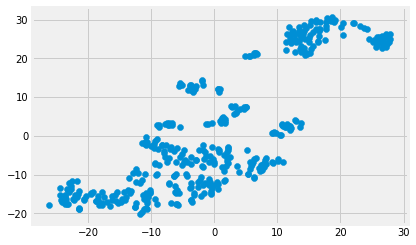

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [6]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_predict = kmeans.fit_predict(X_train_scaled)


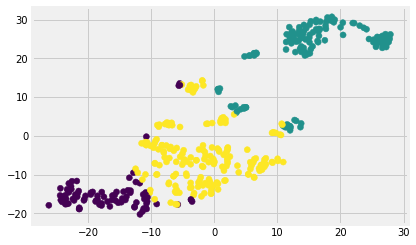

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_predict)
plt.show()

In [8]:
print(f"Категория 0: Средняя цена {y_train[labels_predict == 0].mean():.2f}, cреднее CRIM {X_train['CRIM'][labels_predict == 0].mean():.2f}"
      f"\nКатегория 1: Средняя цена {y_train[labels_predict == 1].mean():.2f}, cреднее CRIM {X_train['CRIM'][labels_predict == 1].mean():.2f}"
      f"\nКатегория 2: Средняя цена {y_train[labels_predict == 2].mean():.2f}, cреднее CRIM {X_train['CRIM'][labels_predict == 2].mean():.2f}")

Категория 0: Средняя цена 27.79, cреднее CRIM 0.07
Категория 1: Средняя цена 16.17, cреднее CRIM 10.80
Категория 2: Средняя цена 24.96, cреднее CRIM 0.42


#### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [9]:
labels_predict_test = kmeans.predict(X_test_scaled)

In [10]:
print(f"Категория 0: Средняя цена {y_test[labels_predict_test == 0].mean():.2f}, cреднее CRIM {X_test['CRIM'][labels_predict_test == 0].mean():.2f}"
      f"\nКатегория 1: Средняя цена {y_test[labels_predict_test == 1].mean():.2f}, cреднее CRIM {X_test['CRIM'][labels_predict_test == 1].mean():.2f}"
      f"\nКатегория 2: Средняя цена {y_test[labels_predict_test == 2].mean():.2f}, cреднее CRIM {X_test['CRIM'][labels_predict_test == 2].mean():.2f}")

Категория 0: Средняя цена 31.35, cреднее CRIM 0.06
Категория 1: Средняя цена 16.44, cреднее CRIM 10.17
Категория 2: Средняя цена 21.86, cреднее CRIM 0.27
